# Author: Dayanand Shah

# Task 3: Exploratory Data Analysis - Retail

Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.

In [1]:
#imported required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing data
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.shape

(9994, 13)

In [7]:
#checking for duplicates
data.duplicated().sum()

17

In [8]:
data.drop_duplicates(inplace =True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(9977, 13)

In [11]:
#checking correlations
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


# DATA VISUALIZATION

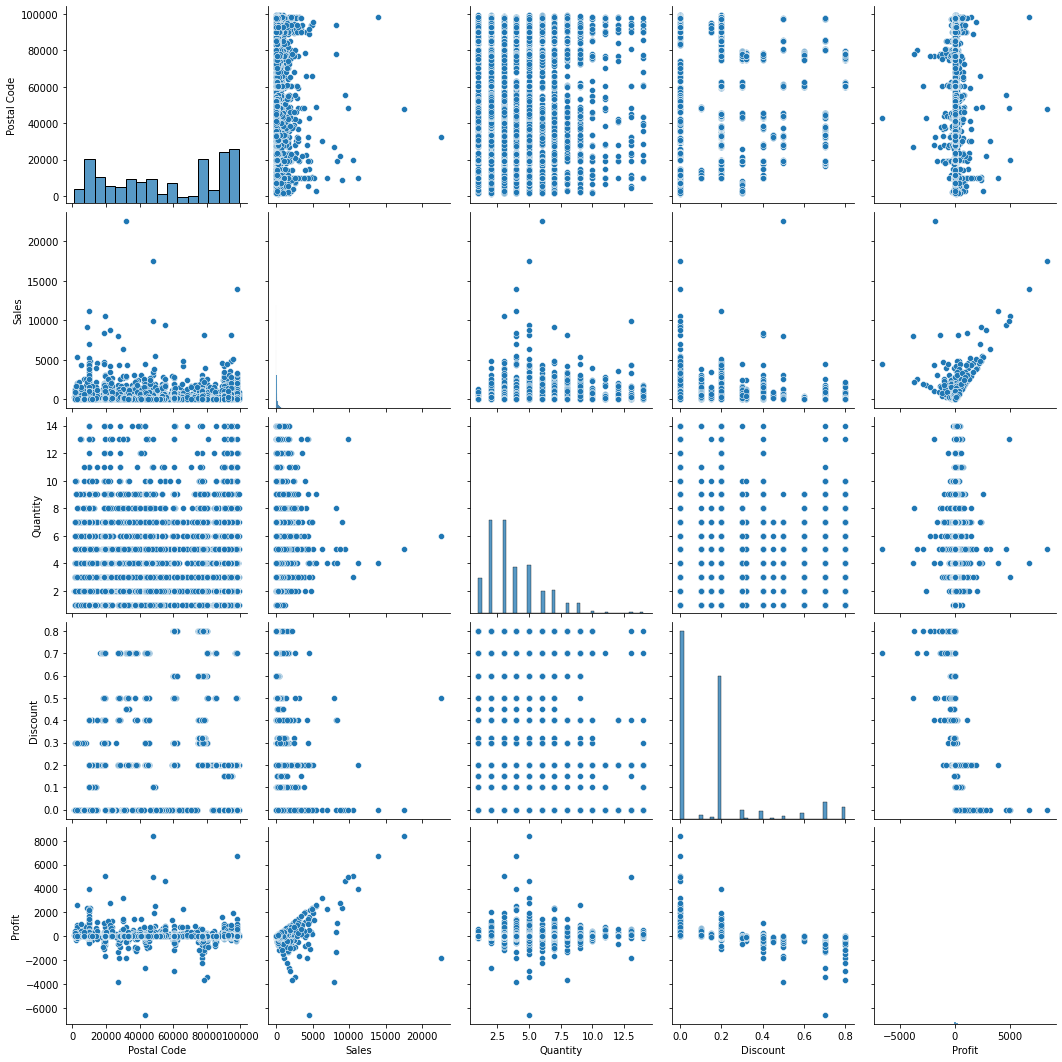

In [12]:
sns.pairplot(data, height=3);

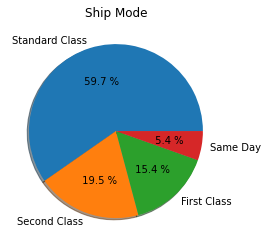

In [13]:
plt.pie(data['Ship Mode'].value_counts(),labels= data['Ship Mode'].value_counts().index,autopct='% 1.1f %%', shadow=True)
plt.title('Ship Mode');

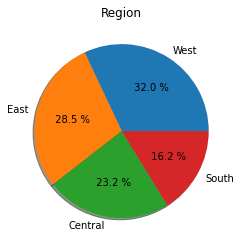

In [14]:
plt.pie(data['Region'].value_counts(), labels=data['Region'].value_counts().index,autopct='% 1.1f %%', shadow=True);
plt.title('Region');

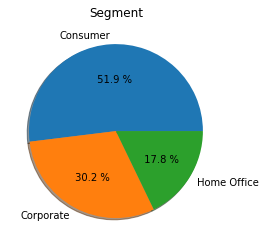

In [15]:
plt.pie(data['Segment'].value_counts(), labels=data['Segment'].value_counts().index,autopct='% 1.1f %%', shadow=True);
plt.title('Segment');

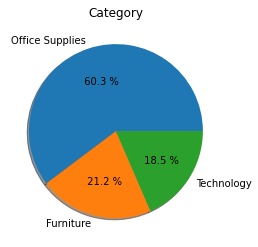

In [16]:
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index,autopct='% 1.1f %%', shadow=True);
plt.title('Category');

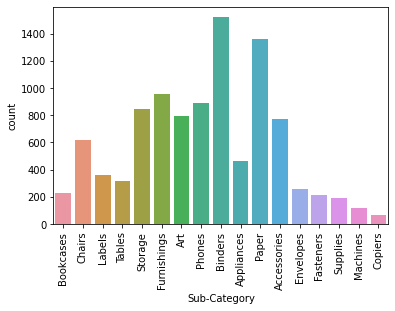

In [17]:
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90);

C:\Users\DAYANAND SHAH\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


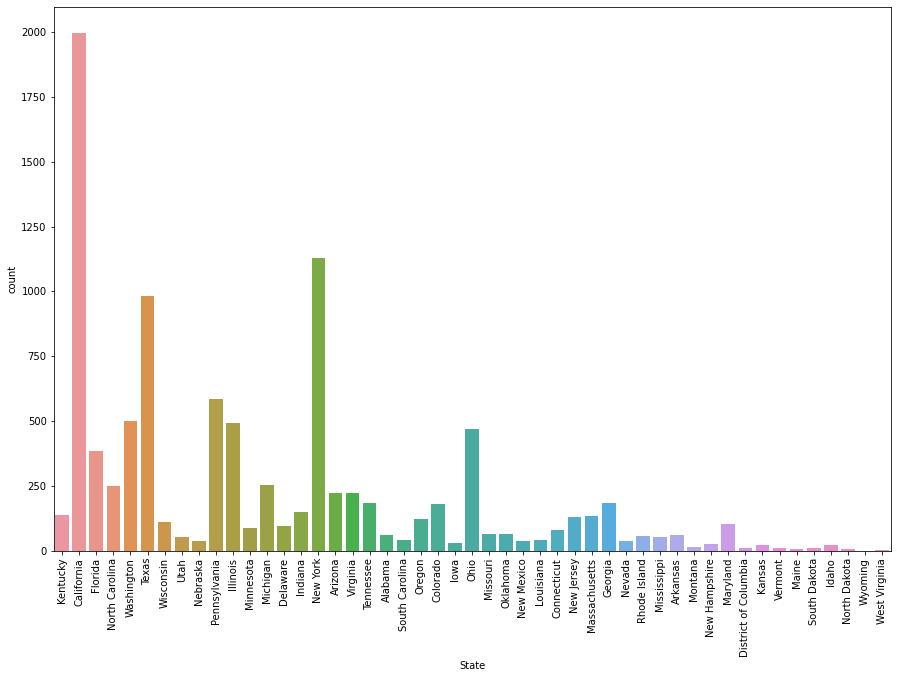

In [18]:
plt.figure(figsize=(15,10));
sns.countplot(data['State'])
plt.xticks(rotation=90);

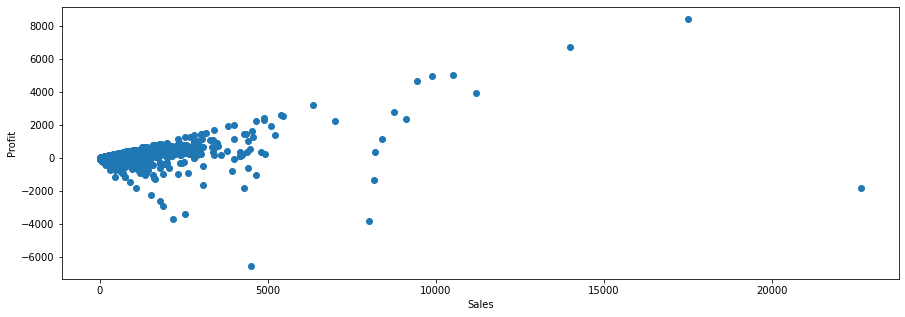

In [19]:
#Profit vs Discount
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(data['Sales'],data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

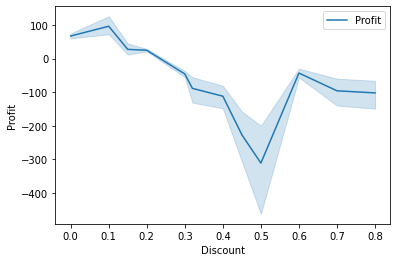

In [20]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

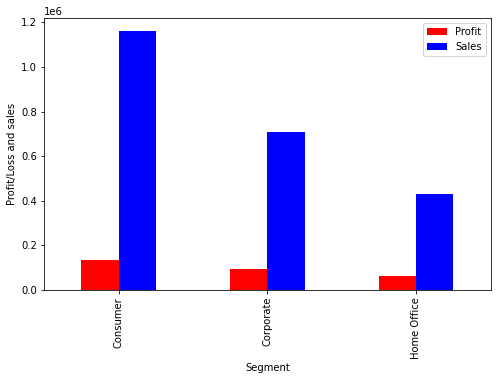

In [21]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['red','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

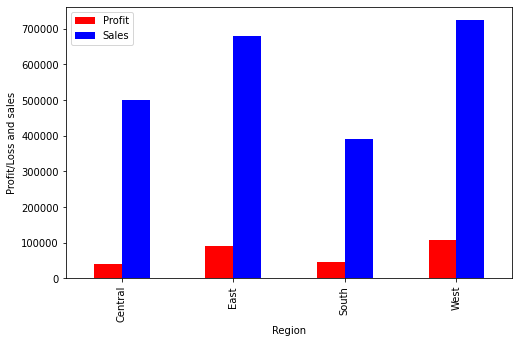

In [22]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['red','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

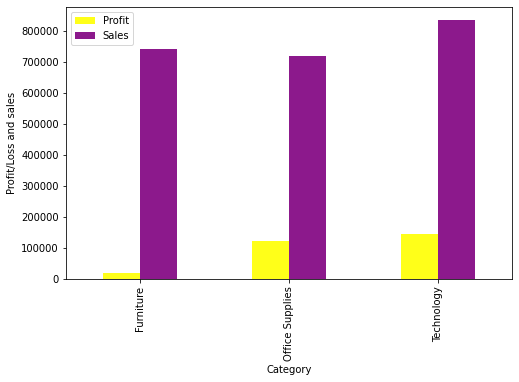

In [23]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

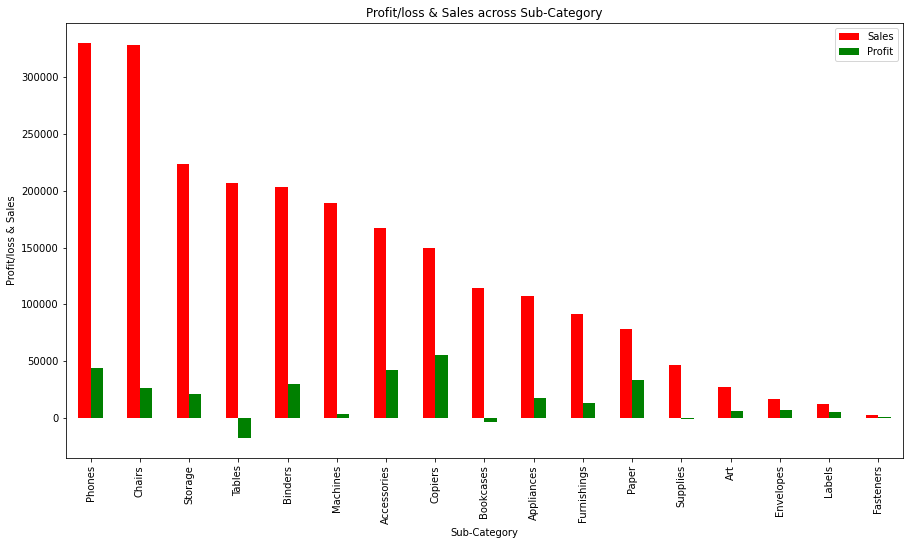

In [24]:
a = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
a[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title('Profit/loss & Sales across Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

In [25]:
data['State'].value_counts()


California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

In [26]:
data_state= data.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
data_state

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,229.246629,0.072946,38.241878
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


In [27]:
data_state1 = data_state.sort_values('Profit')

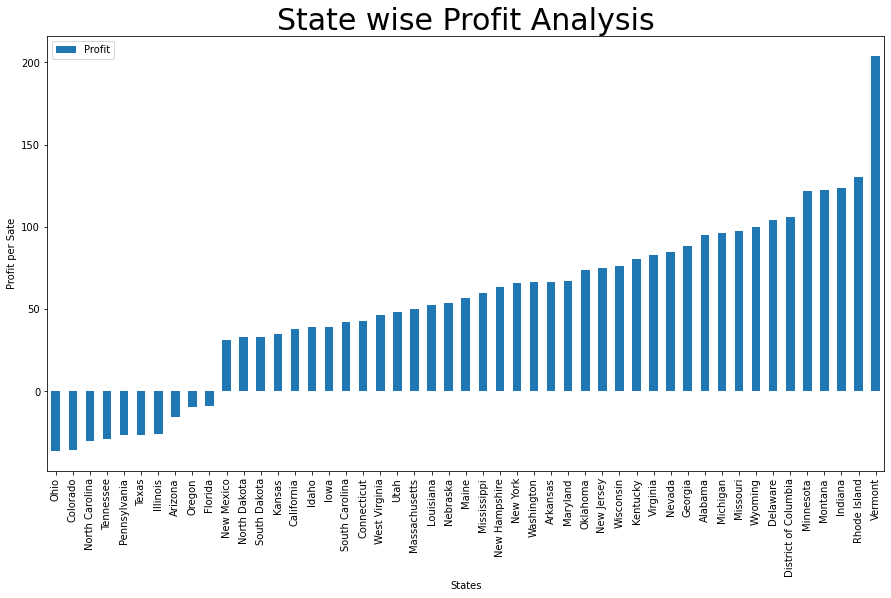

In [28]:
data_state1[['Profit']].plot(kind = 'bar', figsize = (15,8))
plt.title('State wise Profit Analysis', fontsize = 30)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

# Final Report

-Profit and sales are maximum in consumer segment and minimum in Home Office segment

-The business is successful in New York City and Los Angeles

-It needs to focus on Southern and Central part of the Country

-It also needs to work on selling Home Office supplies

-States like Wyoming and West Virginia needs the attention of the business the most

-Tables and Bookmarks sub-categories facing huge loss

-chairs have high sales but less profit compared to phones
-Phones sub-category have high sales.


As a business manager, we try to find out the weak areas where you can work to make more profit?

-Technology and Office Supplies have high profit.

-Furniture have less profit